In [2]:
#libraries required to make model
import tensorflow as tf   
from tensorflow import keras
import PIL

In [3]:
physical_device=tf.config.experimental.list_physical_devices('GPU')
print("No. of GPUs Available: ",len(physical_device))
tf.config.experimental.set_memory_growth(physical_device[0],True)

No. of GPUs Available:  1


## Importing Libraries

In [6]:
import numpy as np
import sys
import PIL
#CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Dropout,MaxPooling2D,Conv2D,Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
#save model
from tensorflow.keras.models import load_model
#image preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
#dividing data into train and validation
import os.path
import random as rnd
import glob
import shutil
#face detection test
import cv2


In [10]:
import matplotlib.pyplot as plt               # for visualization
%matplotlib inline
from keras import regularizers

### Task 3: Building a Multi-Layer Perceptron
We have used Sequential API which helps us define the model in a step by step manner by adding multiple dense layer.
The term kernel_initializer is a f statistical distribution that initializes weights for the model. We have used uniform distribution in this case. Softmax is being used for the final activation layer as it “returns a probability distribution over the target classes in a multiclass classification problem” 
###### Dropout is being used for optimization. It is a regularization technique in which we ommit units randomly to reduce the chances of overfitting of a model.

In [252]:
    classifier = Sequential()
    #First Layer
    classifier.add(Dense(units = 124, kernel_initializer = 'uniform', activation = 'relu', input_shape = (12288,), 
                         kernel_regularizer=regularizers.l2(0.01))) # L2 regularization
    classifier.add(Dropout(0.5))
    # Intermediate Layers
    for itr in range(2):
        classifier.add(Dense(units = 62, kernel_initializer = 'uniform', activation = 'relu', 
                             kernel_regularizer=regularizers.l2(0.01))) # L2 regularization
        classifier.add(Dropout(0.5))   
    # Last Layer
    classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'softmax'))
   

In [254]:
classifier.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 124)               1523836   
_________________________________________________________________
dropout_34 (Dropout)         (None, 124)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 62)                7750      
_________________________________________________________________
dropout_35 (Dropout)         (None, 62)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 62)                3906      
_________________________________________________________________
dropout_36 (Dropout)         (None, 62)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 5)               

### Task 4: Loss Function and Optimizer 
We have used adam for optimizaion. It is bit different from the textbook, gradient descent. Gradient descent maintains a single learning rate for all weight updates but Adam allows us to add decay which slows down the learning rate. As we move closer to our optimized value the incresed decay helps as it causes less deviation in the weights.

Loss function being used here is called binary crossentropy. It is generally used for classification as it uses probability distribution to give us a 1 or 0 value. 
###### I did not use categorical crossentropy as I am manually encoding the data int one-hot encoded labels.

In [255]:
op = Adam(lr=1e-3, decay=1e-3 / 30)

In [256]:
 classifier.compile(optimizer = op , loss = 'binary_crossentropy', metrics = ['accuracy'])

### Task 1: Loading Data 
I have created an array of all our resultant labels and then iterated through it using a simple for loop. For each iteration I have acquired the folder containing the images of that dataset and converted the images into 64,64,3 and finally flattened them to receive a shape of (12288,). Flattening has been used as we are using ANN to compute results.

For label encoding I define a list with 5 zero values. I acquire the index of the current category, convert that index into 1 and finally append it to out label array.
###### At the end i have used shuffle from sklearn to shuffle the dataset for better training results

In [234]:
class_names=['elefante', 'farfalla','mucca','pecora','scoiattolo']

In [235]:
training_data = []
label=[]
for class_name in class_names: # iterate through classes
    try:
        files = glob.glob("D:/FinalDphi/animal_dataset_intermediate/train/"+class_name+"_train/*") # get files in each folder(class)
        for f in files:
            img = cv2.imread(f) #read the image
            img = cv2.resize(img,(64,64)).flatten() #resize the image
            training_data.append(np.array(img)) #Append images and corresponding labels to data
            la=[0,0,0,0,0]
            la[class_names.index(class_name)]=1
            label.append(la)
    except:
        pass
from sklearn.utils import shuffle
training_data, label= shuffle(training_data, label, random_state=0)

In [236]:
training_data[0]

array([218, 182, 174, ...,  86, 133, 137], dtype=uint8)

#### Task 2: Pre-processing
For pre-processing I have converted into a numpy array and changed the type to float32 to be able to run the value.

In [237]:
training_data = np.array(training_data) 
training_data = training_data.astype('float32')

In [238]:
label = np.array(label) 
label = label.astype('float32')

In [239]:
label

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [240]:
training_data[0].shape

(12288,)

### Task 5: Training the model
I used very generic values to train the model as first I was concerned about comparing the results of ANN to CNN. Training Validation split 80:20.

In [257]:
cl=classifier.fit(x=training_data,y=label, validation_split=0.2, batch_size = 64, epochs = 30,steps_per_epoch=len(training_data)*0.8/64,verbose=1)

Epoch 1/30
103/102 [==============================] - 1s 7ms/step - loss: 11.4409 - accuracy: 0.2154 - val_loss: 7.7839 - val_accuracy: 0.2311
Epoch 2/30
103/102 [==============================] - 1s 6ms/step - loss: 5.9533 - accuracy: 0.2299 - val_loss: 4.4820 - val_accuracy: 0.2311
Epoch 3/30
103/102 [==============================] - 1s 5ms/step - loss: 3.6243 - accuracy: 0.2305 - val_loss: 2.9318 - val_accuracy: 0.2311
Epoch 4/30
103/102 [==============================] - 1s 5ms/step - loss: 2.5450 - accuracy: 0.2302 - val_loss: 2.2197 - val_accuracy: 0.2311
Epoch 5/30
103/102 [==============================] - 1s 5ms/step - loss: 2.0387 - accuracy: 0.2314 - val_loss: 1.9052 - val_accuracy: 0.2146
Epoch 6/30
103/102 [==============================] - 1s 5ms/step - loss: 1.8257 - accuracy: 0.2312 - val_loss: 1.7607 - val_accuracy: 0.2311
Epoch 7/30
103/102 [==============================] - 1s 5ms/step - loss: 1.7334 - accuracy: 0.2315 - val_loss: 1.6949 - val_accuracy: 0.2311
Epoch

### Task 6:Visualiztion

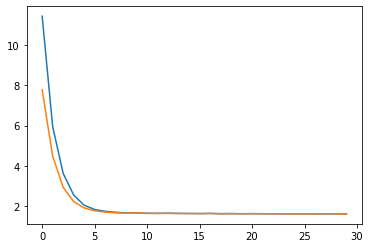

In [258]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cl.history['loss'])
plt.plot(cl.history['val_loss'])

In [259]:
classifier.evaluate(x=training_data,y=label,batch_size=32)

257/257 [==============================] - 1s 3ms/step - loss: 1.6057 - accuracy: 0.2319


[1.6057441234588623, 0.23194241523742676]

###### The glaringly conclusive result is that the model is not performing well.

## Task 7: Building a CNN
We have used Sequential API which helps us define the model in a step by step manner. I tried increasing the input shape and it gave me a better result. Channel dimension is just to make sure that the RGB channels remain the last input in shape.

Convolutional neural networks apply a filter to an input to create a feature map that summarizes the presence of detected features in the input. The Conv layer is the core building block of a Convolutional Network that does most of the computational heavy lifting. In simple terms, we are just taking a small window and picking up samples from the image.

Every Convulution is layer is followed by a layer for relu activation. The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. ReLU is important because it does not saturate; the gradient is always high (equal to 1) if the neuron activates. As long as it is not a dead neuron, successive updates are fairly effective. ReLU is also very quick to evaluate.

Batch normalization is a method used to make artificial neural networks faster and more stable through normalization of the input layer by re-centering and re-scaling. Basically this is used for accelerating the whole process.

The pooling operation involves sliding a two-dimensional filter over each channel of feature map and summarising the features lying within the region covered by the filter. It reducea the dimensions of the feature maps, thereby reducing the trainable parameters. As  further operations are performed on summarised features instead of precisely positioned features generated by the convolution layer, the model becomes more robust.
###### The dense layer is given the value of 5 as we have 5 labels in our dataset
###### Dropout is being used for optimization. It is a regularization technique in which we ommit units randomly to reduce the chances of overfitting of a model.
Softmax is being used for the final activation layer as it “returns a probability distribution over the target classes in a multiclass classification problem” 

###### Note: The steps have been repeated in order to increase the model accuracy ( Later On)

In [35]:
model = Sequential()
inputShape = (96, 96, 3)
chanDim = -1

In [36]:
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

In [37]:
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [38]:
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 96, 96, 32)        896       
_________________________________________________________________
activation_11 (Activation)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 64)       

from PIL import Image
from PIL import ImageFilter
from os import listdir
import glob
import random
j=0
for i in random.sample(glob.glob('D:/FinalDphi/animal_dataset_intermediate/train/*'),1152):
    imageObject = Image.open(i);
    imageObject=imageObject.convert('RGB')
    g=imageObject.transpose(Image.FLIP_LEFT_RIGHT)
    g.save('D:/FinalDphi/animal_dataset_intermediate/train/'+str(j)+'.jpg', 'JPEG')
    j+=1

### Task 1: Loading Data  (2.0) 
Image Data Generator was used to load the data as it automatically creates the label (by defining classes) form the batches of perticular batch sizes, and automatically converts the images into the target size.
Then to create a validation dataset I used random and glob library to select 10% images randomly from each category and move it to a new folder called Validation with similar label folders.
Valid batches was also loaded using Image Data genertor.

In [20]:
train_path = 'D:/FinalDphi/animal_dataset_intermediate/train/'
# validate_path='/Dataset COVID-19 Augmented/validate'
# test_path = '/Dataset COVID-19 Augmented/test'

In [31]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(96,96), classes=['elefante_train', 'farfalla_train','mucca_train','pecora_train','scoiattolo_train'], batch_size=32)

Found 7377 images belonging to 5 classes.


In [26]:
for i in rnd.sample(glob.glob('D:/FinalDphi/animal_dataset_intermediate/train/elefante_train/*'),130):
    shutil.move(i,'D:/FinalDphi/animal_dataset_intermediate/validate/elefante_train/')

In [27]:
for i in rnd.sample(glob.glob('D:/FinalDphi/animal_dataset_intermediate/train/farfalla_train/*'),190):
        shutil.move(i,'D:/FinalDphi/animal_dataset_intermediate/validate/farfalla_train/')

In [28]:
for i in rnd.sample(glob.glob('D:/FinalDphi/animal_dataset_intermediate/train/mucca_train/*'),168):
        shutil.move(i,'D:/FinalDphi/animal_dataset_intermediate/validate/mucca_train/')

In [29]:
for i in rnd.sample(glob.glob('D:/FinalDphi/animal_dataset_intermediate/train/pecora_train/*'),164):
        shutil.move(i,'D:/FinalDphi/animal_dataset_intermediate/validate/pecora_train/')

In [30]:
for i in rnd.sample(glob.glob('D:/FinalDphi/animal_dataset_intermediate/train/scoiattolo_train/*'),167):
        shutil.move(i,'D:/FinalDphi/animal_dataset_intermediate/validate/scoiattolo_train/')

In [32]:
validate_path='D:/FinalDphi/animal_dataset_intermediate/validate/'

In [33]:
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=validate_path, target_size=(96,96), classes=['elefante_train', 'farfalla_train','mucca_train','pecora_train','scoiattolo_train'], batch_size=32)

Found 819 images belonging to 5 classes.


### Task 4: Loss Function and Optimizer
We have used adam for optimizaion once again so the explanation remains the same. 

Loss function being used here is called categorical crossentropy as it gave better results.
Input_dimensions are based on model summarry and batch size remains the same( Used while loading the images).
I trained it to 30 epochs just for comparison with ANN. The learning rate remained the same. I decreased the decay by a bit to reach the optimum value a bit quicker.

In [22]:
BS = 32
IMAGE_DIMS = (96, 96, 3)
INIT_LR = 1e-3
EPOCHS=30

In [23]:
EPOCHS=30
opt = Adam(lr=1e-3, decay=INIT_LR / EPOCHS)

### Task 5: Training the model
I used very generic values to train the model as first I was concerned about comparing the results of ANN to CNN. Training Validation split 90:10.

In [40]:
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
H = model.fit(x=train_batches, batch_size=32,validation_data=valid_batches,steps_per_epoch=len(train_batches), epochs= 30, verbose=1)

Epoch 1/30
231/231 [==============================] - 21s 91ms/step - loss: 1.3330 - accuracy: 0.5539 - val_loss: 1.2722 - val_accuracy: 0.5568
Epoch 2/30
231/231 [==============================] - 25s 109ms/step - loss: 0.9631 - accuracy: 0.6485 - val_loss: 1.1248 - val_accuracy: 0.6129
Epoch 3/30
231/231 [==============================] - 29s 125ms/step - loss: 0.8166 - accuracy: 0.6993 - val_loss: 1.1108 - val_accuracy: 0.5873
Epoch 4/30
231/231 [==============================] - 24s 106ms/step - loss: 0.7169 - accuracy: 0.7346 - val_loss: 0.7925 - val_accuracy: 0.7387
Epoch 5/30
231/231 [==============================] - 25s 106ms/step - loss: 0.6464 - accuracy: 0.7647 - val_loss: 0.7382 - val_accuracy: 0.7570
Epoch 6/30
231/231 [==============================] - 24s 106ms/step - loss: 0.5817 - accuracy: 0.7885 - val_loss: 0.8016 - val_accuracy: 0.7216
Epoch 7/30
231/231 [==============================] - 24s 105ms/step - loss: 0.6090 - accuracy: 0.7742 - val_loss: 0.9151 - val_acc

In [ ]:
# H = model.fit(x=train_batches, batch_size=32,validation_data=valid_batches,steps_per_epoch=len(train_batches), epochs= 30, verbose=1)

### Task 6:Visualiztion (2.0)

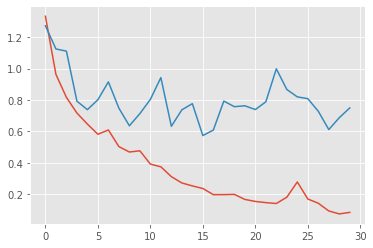

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])

In [41]:
model.save("D:/FinalDphi/mod.h5")

In [108]:
model.evaluate(train_batches,batch_size=32)

231/231 [==============================] - 10s 43ms/step - loss: 0.0062 - accuracy: 0.9992


[0.006182956974953413, 0.999186635017395]

### Task 9: Prediction
The test_data was re-ordered into the csv format by using PIL library. Now our test_data lies in a new target called test_new. I used data generator to load the images in batches. 
##### Once I received the predictions I used argmax(because we are using softmax) to convert it into integer values)

In [45]:
import pandas as pd

In [46]:
test=pd.read_csv('D:/FinalDphi/animal_dataset_intermediate/Testing_set_animals.csv')

In [47]:
test.head()

,filename,target
0,e030b20928e90021d85a5854ee454296eb70e3c818b413...,NaN
1,e030b20929e90021d85a5854ee454296eb70e3c818b413...,NaN
2,e030b2092be90021d85a5854ee454296eb70e3c818b413...,NaN
3,e030b2092ce90021d85a5854ee454296eb70e3c818b413...,NaN
4,e030b2092de90021d85a5854ee454296eb70e3c818b413...,NaN


In [ ]:
import PU

In [72]:
from PIL import Image
from PIL import ImageFilter
for i in range(len(test)):
    imgo = Image.open('D:/FinalDphi/animal_dataset_intermediate/test/'+str(test['filename'][i]))
    imgo=imgo.convert('RGB')
    imgo.save('D:/FinalDphi/animal_dataset_intermediate/new_test/'+str(i)+'.jpg', 'JPEG')

In [73]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [82]:
test_generator = test_datagen.flow_from_directory("D:/FinalDphi/animal_dataset_intermediate/",
                                                    batch_size = 32,
                                                    classes=['new_test'], 
                                                    target_size = (96, 96))

Found 910 images belonging to 1 classes.


In [83]:
preds = model.predict(test_generator) 
predicted_labels  = np.argmax(preds,axis=1)

In [84]:
predicted_labels

array([3, 3, 1, 3, 3, 4, 3, 2, 1, 1, 4, 1, 2, 3, 2, 1, 3, 3, 3, 1, 1, 2,
       1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3,
       1, 1, 3, 3, 4, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 3, 3, 2, 1, 3, 1, 3,
       3, 1, 3, 3, 4, 1, 4, 3, 1, 1, 1, 2, 3, 3, 1, 1, 1, 1, 3, 1, 2, 3,
       1, 2, 1, 3, 1, 2, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 0,
       4, 3, 1, 4, 4, 3, 3, 2, 3, 3, 1, 3, 2, 3, 1, 3, 1, 1, 2, 3, 3, 3,
       2, 1, 1, 1, 1, 4, 1, 1, 3, 1, 3, 1, 1, 4, 1, 3, 1, 4, 3, 2, 1, 3,
       1, 3, 1, 3, 3, 4, 1, 1, 2, 1, 3, 4, 1, 1, 3, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 2, 1, 2, 3, 3, 3, 1, 3, 0, 1, 3, 3, 1, 1, 4, 3, 1, 3, 0, 1,
       3, 2, 4, 3, 1, 2, 3, 3, 1, 2, 1, 1, 3, 2, 3, 3, 2, 3, 1, 4, 3, 3,
       1, 3, 3, 4, 3, 3, 1, 4, 3, 3, 1, 1, 4, 2, 2, 2, 3, 4, 1, 1, 3, 2,
       3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 2, 3, 2, 1, 3, 1, 3, 1,
       1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 2, 3, 1, 3, 4, 2, 1, 3, 3, 3, 1, 3,
       4, 3, 4, 3, 3, 3, 3, 2, 3, 1, 3, 3, 1, 3, 1,

In [88]:
cl=['elefante', 'farfalla','mucca','pecora','scoiattolo']

Predicted values converted into label

In [89]:
predicted_values=[cl[i] for i in predicted_labels]

In [94]:
label_map = (train_batches.class_indices)

In [95]:
label_map

{'elefante_train': 0,
 'farfalla_train': 1,
 'mucca_train': 2,
 'pecora_train': 3,
 'scoiattolo_train': 4}

In [90]:
predicted_values

['pecora',
 'pecora',
 'farfalla',
 'pecora',
 'pecora',
 'scoiattolo',
 'pecora',
 'mucca',
 'farfalla',
 'farfalla',
 'scoiattolo',
 'farfalla',
 'mucca',
 'pecora',
 'mucca',
 'farfalla',
 'pecora',
 'pecora',
 'pecora',
 'farfalla',
 'farfalla',
 'mucca',
 'farfalla',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'mucca',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'farfalla',
 'pecora',
 'farfalla',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'farfalla',
 'farfalla',
 'pecora',
 'pecora',
 'scoiattolo',
 'mucca',
 'farfalla',
 'farfalla',
 'mucca',
 'farfalla',
 'farfalla',
 'farfalla',
 'pecora',
 'farfalla',
 'farfalla',
 'pecora',
 'pecora',
 'mucca',
 'farfalla',
 'pecora',
 'farfalla',
 'pecora',
 'pecora',
 'farfalla',
 'pecora',
 'pecora',
 'scoiattolo',
 'farfalla',
 'scoiattolo',
 'pecora',
 'farfalla',
 'farfalla',
 'farfalla',
 'mucca',
 'pecora',
 'pecora',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'pec

In [93]:
predicted_values[490:494]

['scoiattolo', 'pecora', 'farfalla', 'pecora']

In [91]:
res = pd.DataFrame(predicted_values) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]
res.to_csv("prediction_Assignment2_101.csv") 

After trying for ages and receiving and receiving 97% train accuracy and 81% validation accuracy I figured out that the results werent satisfactory for me. The difference between train and validation was a clear sign of overfitting and the result on dphi wasnt that good so I researched a bit and came up with this solution

## Task 7: Building The final model
I used VGG-16 to train the the model.VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014.
This can be classified as deep transfered learning.

In [171]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.utils import class_weight, shuffle
from keras import applications
from keras import optimizers
from keras.utils import to_categorical
from keras.models import Sequential, Model, load_model
from keras.layers import Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

### Task 1: Loading Data  Final
Through a bit of research I found this way to load data using csv. I found it interesting and useful considering we need to reoreder images for predictions. Basically we are doing the same process of saving the data by going through each foder and assigning the label but we are saving the data in a csv instead of saving them in a list. I also split the data further into train and validation sets but ended up not using the split and going with th e whole dataframe.


In [172]:
foldernames = os.listdir('D:/FinalDphi/animal_dataset_intermediate/train')
categories = []
files = []
i = 0
for k, folder in enumerate(foldernames):
    filenames = os.listdir("D:/FinalDphi/animal_dataset_intermediate/train/" + folder);
    for file in filenames:
        files.append("D:/FinalDphi/animal_dataset_intermediate/train/" + folder + "/" + file)
        categories.append(k)
        
df = pd.DataFrame({
    'filename': files,
    'category': categories
})
train_df = pd.DataFrame(columns=['filename', 'category'])
for i in range(10):
    train_df = train_df.append(df[df.category == i].iloc[:500,:])

train_df.head()
train_df = train_df.reset_index(drop=True)
train_df

,filename,category
0,D:/FinalDphi/animal_dataset_intermediate/train...,0
1,D:/FinalDphi/animal_dataset_intermediate/train...,0
2,D:/FinalDphi/animal_dataset_intermediate/train...,0
3,D:/FinalDphi/animal_dataset_intermediate/train...,0
4,D:/FinalDphi/animal_dataset_intermediate/train...,0
...,...,...
2495,D:/FinalDphi/animal_dataset_intermediate/train...,4
2496,D:/FinalDphi/animal_dataset_intermediate/train...,4
2497,D:/FinalDphi/animal_dataset_intermediate/train...,4
2498,D:/FinalDphi/animal_dataset_intermediate/train...,4


In [173]:
len(df)

8196

In [174]:
df[df['filename']=='D:/FinalDphi/animal_dataset_intermediate/train/elefante_train/filenames_elefante_train.txt']

,filename,category


In [175]:
x = df['filename']
y = df['category']

x, y = shuffle(x, y, random_state=8)

### Task 8: Pre-procesing Optimization Techniques
I have previously talked about decay and applying dropout for optimization. This time i used image centering as well. At the core of it, image centering is just a scaling technique but it lead to better results. The process simply involves calculating the mean pixel value across the entire training dataset, then subtract it from each image.  The mean pixel value for centered images will be zero.

I used TQDM just to ensure that the process was working well. it is a progress bar library with good support for nested loops and Jupyter/IPython notebooks.

In [176]:
def centering_image(img):
    size = [256,256]
    
    img_size = img.shape[:2]
    
    # centering
    row = (size[1] - img_size[0]) // 2
    col = (size[0] - img_size[1]) // 2
    resized = np.zeros(list(size) + [img.shape[2]], dtype=np.uint8)
    resized[row:(row + img.shape[0]), col:(col + img.shape[1])] = img

    return resized

images = []
with tqdm(total=len(df)) as pbar:
    for i, file_path in enumerate(df.filename.values):
        #read image
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
#resize
        if(img.shape[0] > img.shape[1]):
            tile_size = (int(img.shape[1]*256/img.shape[0]),256)
        else:
            tile_size = (256, int(img.shape[0]*256/img.shape[1]))

        #centering
        img = centering_image(cv2.resize(img, dsize=tile_size))

        #out put 224*224px 
        img = img[16:240, 16:240]
        images.append(img)
        pbar.update(1)

images = np.array(images)        

C:\Users\Predator\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


### Training Dataset Final

I decided to increase the dimenstions to 224 as increasing dimenstions was improving the result. The code snipped bellow just shuffles the data and splits into train and validation sets(80:20). 
###### It also converts data into train and validations splits for training
###### Further scaling is done through dividing it by 255 and finally it has been converted into a numpy array of float for training.

In [180]:
data_num = len(y)
random_index = np.random.permutation(data_num)
x_shuffle = []
y_shuffle = []
for i in range(data_num):
    x_shuffle.append(images[random_index[i]])
    y_shuffle.append(y[random_index[i]])
    
x = np.array(x_shuffle) 
y = np.array(y_shuffle)
val_split_num = int(round(0.2*len(y)))
x_train = x[val_split_num:]
y_train = y[val_split_num:]
x_test = x[:val_split_num]
y_test = y[:val_split_num]

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

img_rows, img_cols, img_channel = 224, 224, 3
name_animal = []
for i in range(5):
    path = df[df.category == i].values[2]
    if path[0].split('/')[-2] == 'elefante':
        name_animal.append('elefante')
    elif path[0].split('/')[-2] == 'farfalla':
        name_animal.append('farfalla')
    elif path[0].split('/')[-2] == 'mucca':
        name_animal.append('mucca')
    elif path[0].split('/')[-2] == 'pecora':
        name_animal.append('pecora')
    elif path[0].split('/')[-2] == 'scoiattolo':
        name_animal.append('scoiattolo')

x_train (6557, 224, 224, 3)
y_train (6557,)
x_test (1639, 224, 224, 3)
y_test (1639,)


### Task 4: Model Summary, Loss Function and Optimizer 
The base of the modell= is vgg.16 and then using sequential apu two dense layer have been added with the final layer having 5 units to mark the 5 categories. The use of relu and softmax has been discused previously. I changed the optimizer to SGD. It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient by an estimate thereof. In simpler terms, we define a momentum, which is a moving average of our gradients. I found this approach very flexible.

Loss function being used here is called binary crossentropy. It is generally used for classification as it uses probability distribution to give us a 1 or 0 value. 
###### I did not use categorical crossentropy as labels are already one-hot encoded.

In [183]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(5, activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

### Optimization through image augmentation
Augmentation is just varying our current dataset in diffent formats( like flipping/moving) and appenfing it to the dataset to increase the dataset and improve its perfirmance)

In [181]:
batch_size = 32
epochs = 50

train_datagen = ImageDataGenerator(
        rotation_range=30, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True)
train_datagen.fit(x_train)

I learned about checkpoints. Checkpoint moniters the validation accuracy( as validation is more reliable and accuracy is our metric) and stops the model once we reach an optimal point after which the model starts to overfit. 
###### My model ran for the full 30 epochs so I increased it to 50 to get a converging value.

In [184]:
history = model.fit_generator(
    train_datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[ModelCheckpoint('VGG16-transferlearning.model', monitor='val_acc')]
)

Epoch 1/50
204/204 [==============================] - ETA: 0s - loss: 0.4061 - accuracy: 0.4996WARNING:tensorflow:From C:\Users\Predator\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: VGG16-transferlearning.model\assets
204/204 [==============================] - 131s 645ms/step - loss: 0.4061 - accuracy: 0.4996 - val_loss: 0.2785 - val_accuracy: 0.6986
Epoch 2/50
204/204 [==============================] - 130s 637ms/step - loss: 0.2330 - accuracy: 0.7413 - val_loss: 0.1847 - val_accuracy: 0.7974
Epoch 3/50
204/204 [==============================] - 129s 630

Epoch 25/50
204/204 [==============================] - 129s 633ms/step - loss: 0.0313 - accuracy: 0.9718 - val_loss: 0.0530 - val_accuracy: 0.9475
Epoch 26/50
204/204 [==============================] - 129s 631ms/step - loss: 0.0316 - accuracy: 0.9693 - val_loss: 0.0500 - val_accuracy: 0.9494
Epoch 27/50
204/204 [==============================] - 128s 627ms/step - loss: 0.0275 - accuracy: 0.9769 - val_loss: 0.0487 - val_accuracy: 0.9536
Epoch 28/50
204/204 [==============================] - 129s 634ms/step - loss: 0.0249 - accuracy: 0.9770 - val_loss: 0.0503 - val_accuracy: 0.9530
Epoch 29/50
204/204 [==============================] - 130s 636ms/step - loss: 0.0260 - accuracy: 0.9781 - val_loss: 0.0461 - val_accuracy: 0.9542
Epoch 30/50
204/204 [==============================] - 128s 626ms/step - loss: 0.0235 - accuracy: 0.9808 - val_loss: 0.0445 - val_accuracy: 0.9573
Epoch 31/50
204/204 [==============================] - 130s 636ms/step - loss: 0.0248 - accuracy: 0.9785 - val_loss: 0

##### Visualization

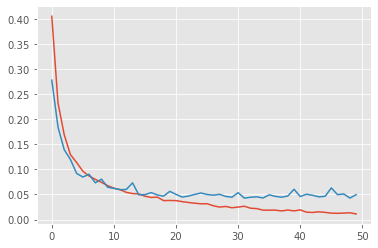

In [185]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [187]:
model.evaluate(x_train,y_train,batch_size=32)

205/205 [==============================] - 34s 165ms/step - loss: 0.0065 - accuracy: 0.9942


[0.006494170054793358, 0.9942046403884888]

In [188]:
model.evaluate(x_test,y_test,batch_size=32)

52/52 [==============================] - 9s 165ms/step - loss: 0.0496 - accuracy: 0.9591


[0.04964476451277733, 0.9591214060783386]

In [189]:
model.save("D:/FinalDphi/model2.h5")

#### Predictions
I was pretty Happy with the eavluations so I moved on to predictions.
Using the same data Loading technique I was able to load the data in the desired format (mentioned in csv). I did the same preprocessing steps of centering and Rescaling the image.

In [190]:
test_data=pd.read_csv('D:/FinalDphi/animal_dataset_intermediate/Testing_set_animals.csv')

In [191]:
test_data

,filename,target
0,e030b20928e90021d85a5854ee454296eb70e3c818b413...,NaN
1,e030b20929e90021d85a5854ee454296eb70e3c818b413...,NaN
2,e030b2092be90021d85a5854ee454296eb70e3c818b413...,NaN
3,e030b2092ce90021d85a5854ee454296eb70e3c818b413...,NaN
4,e030b2092de90021d85a5854ee454296eb70e3c818b413...,NaN
...,...,...
905,OIP-5ual0F5ZPZRdkGcj8uSH0AHaFj.jpeg,NaN
906,OIP-5VwIBS0B8SxZbUiAHBJg7gHaE8.jpeg,NaN
907,OIP-5WG0rHWAZYtu0utoZfuaAgHaFj.jpeg,NaN
908,OIP-5ZwfeYunG6CT2wEI7OjybQHaEo.jpeg,NaN


In [198]:
x_test = "D:/FinalDphi/animal_dataset_intermediate/test/"+test_data['filename']

In [199]:
x_test

0      D:/FinalDphi/animal_dataset_intermediate/test/...
1      D:/FinalDphi/animal_dataset_intermediate/test/...
2      D:/FinalDphi/animal_dataset_intermediate/test/...
3      D:/FinalDphi/animal_dataset_intermediate/test/...
4      D:/FinalDphi/animal_dataset_intermediate/test/...
                             ...                        
905    D:/FinalDphi/animal_dataset_intermediate/test/...
906    D:/FinalDphi/animal_dataset_intermediate/test/...
907    D:/FinalDphi/animal_dataset_intermediate/test/...
908    D:/FinalDphi/animal_dataset_intermediate/test/...
909    D:/FinalDphi/animal_dataset_intermediate/test/...
Name: filename, Length: 910, dtype: object

##### Centering and rescaling

In [200]:
def centering_image(img):
    size = [256,256]
    
    img_size = img.shape[:2]
    
    # centering
    row = (size[1] - img_size[0]) // 2
    col = (size[0] - img_size[1]) // 2
    resized = np.zeros(list(size) + [img.shape[2]], dtype=np.uint8)
    resized[row:(row + img.shape[0]), col:(col + img.shape[1])] = img

    return resized

test_d = []
with tqdm(total=len(test_data)) as pbar:
    for i, file_path in enumerate(test_data.filename.values):
        #read image
        img = cv2.imread("D:/FinalDphi/animal_dataset_intermediate/test/"+file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
#resize
        if(img.shape[0] > img.shape[1]):
            tile_size = (int(img.shape[1]*256/img.shape[0]),256)
        else:
            tile_size = (256, int(img.shape[0]*256/img.shape[1]))

        #centering
        img = centering_image(cv2.resize(img, dsize=tile_size))

        #out put 224*224px 
        img = img[16:240, 16:240]
        test_d.append(img)
        pbar.update(1)

test_d = np.array(test_d)   

C:\Users\Predator\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


In [205]:
data_n = len(x_test)
testing=[]
for i in range(data_n):
    testing.append(test_d[i])
    
testing = np.array(testing) 
testing = testing.astype('float32')
testing /= 255

In [206]:
preds = model.predict(testing)
#if using softmax activation on output layer
predicted_labels  = np.argmax(preds,axis=1)

In [207]:
predicted_labels

array([1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 0, 0, 0, 3, 1, 0, 0, 3, 1, 0, 0,
       3, 3, 3, 3, 0, 1, 1, 1, 3, 3, 3, 3, 3, 0, 3, 1, 3, 1, 1, 3, 1, 3,
       3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 0, 1, 0, 3, 1, 1, 1, 3, 1,
       3, 1, 1, 3, 0, 1, 3, 3, 3, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 3, 0,
       0, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 1, 0, 3, 3, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 3, 0, 1, 4, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 1, 0, 0, 0, 3, 1, 1,
       0, 3, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 3, 1, 0, 1,
       3, 1, 1, 3, 1, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3,
       3, 2, 0, 0, 3, 0, 4, 0, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0,
       3, 0, 1, 3, 1, 1, 0, 0, 3, 3, 0, 0, 0, 3, 0, 1, 1, 3, 0, 1, 1, 1,
       0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 0, 1, 0, 3, 1, 1, 0, 1, 3, 0, 3, 0,
       3, 3, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 3,
       3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0,

#### Converting values into Labels and making the csv file for predictions

In [208]:
cl2=['elefante', 'farfalla','mucca','pecora','scoiattolo']
predicted_values=[cl2[i] for i in predicted_labels]

In [209]:
res = pd.DataFrame(predicted_values) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]
res.to_csv("prediction_Assignment2_102.csv") 